In [27]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd

In [44]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [3]:
hospital_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
hospital_data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [93]:
import pickle

In [8]:
from sklearn.cluster import KMeans

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
km = KMeans(n_clusters=3)

In [83]:
km.fit(hospital_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
pred = km.predict(hospital_data)

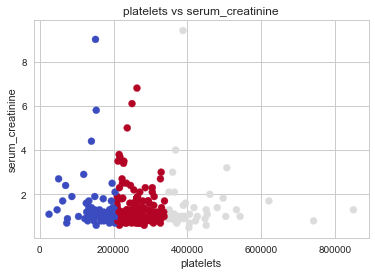

In [89]:
plt.scatter(hospital_data['platelets'],hospital_data['serum_creatinine'],c=pred,cmap='coolwarm')
plt.xlabel('platelets')
plt.ylabel('serum_creatinine')
plt.title('platelets vs serum_creatinine')
plt.savefig('platelets vs serum_creatinine')

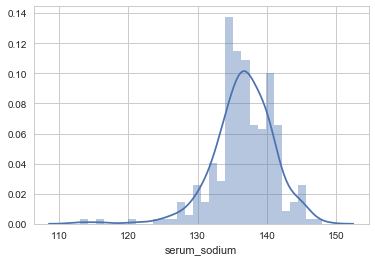

In [90]:
sns.distplot(hospital_data['serum_sodium'],bins=30)

In [98]:
pickle.dump(km,open('cluster_algo.pkl','wb'))

In [102]:
X = hospital_data.drop(['DEATH_EVENT'],axis=1)
y = hospital_data['DEATH_EVENT']

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression()

In [109]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
predicted = model.predict(x_test)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc = StandardScaler()

In [117]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
scaled_tr = sc.transform(x_train)
scaled_te = sc.transform(x_test)

In [121]:
model.fit(scaled_tr,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
pre = model.predict(scaled_te)

In [126]:
model.score(scaled_te,y_test)

0.8166666666666667

In [127]:
print(classification_report(y_test,pre))

             precision    recall  f1-score   support

          0       0.77      0.97      0.86        35
          1       0.94      0.60      0.73        25

avg / total       0.84      0.82      0.81        60



In [128]:
print(confusion_matrix(y_test,pre))

[[34  1]
 [10 15]]


In [129]:
scaled_x = sc.transform(X)

In [133]:
final = model.predict(scaled_x)

In [134]:
print(confusion_matrix(y,final))

[[189  14]
 [ 27  69]]


In [135]:
print(classification_report(y,final))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90       203
          1       0.83      0.72      0.77        96

avg / total       0.86      0.86      0.86       299



The model is a Logistic Regression model that predicts whether a patient will die or not giving the features of the heart disiease. I scaled the data and split into training and testing set with 20% going to testing. The model performed with 815 on the test data and 86% on the overall scaled data.

In [136]:
pickle.dump(model,open('heart_model.pkl','wb'))

In [137]:
total = pd.DataFrame({'original': y, 'predicted': final})

In [140]:
total.to_csv('predictions table.csv')